# Project 2: *Jeopardy!* Due on Monday, December 2 at 11:59PM.

In this project, you will explore data from the game show *Jeopardy!*

### Logistics


**Deadline.** This project is due at 11:59pm on Monday, December 2. This is the hardest assignment of the quarter, and as you know, it's **much** better to be early than late, so start working now.

**Late Submissions.** Late submissions will be accepted up to 24 hours after the deadline for a ten percent deduction.

**Submission Process.** Since this project involves running several long simulations, the submission process for this assignment is a bit different than usual. Please follow the submissions instructions carefully or we may not be able to grade your project. It may take you about an hour to complete these steps - they *all need to be done before the 11:59pm deadline*, so don't start too late!
1. Save a copy of each histogram by right clicking on the histogram or by taking a screenshot. Submit these images to Gradescope. You only need to submit these images to Gradescope, not a PDF of the whole assignment. 
2. For designated code cells, convert the cell type to Markdown before submitting, using the drop-down menu. 
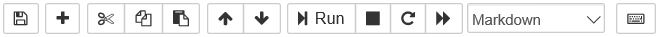
This means these code cells won't run, but your code will still be there if you need to go back and make changes. You can find all the designated cells to change by searching for the term "CONVERT TO MARKDOWN BEFORE SUBMITTING" using Control+F. The cells you need to change are between green bars.
3. Select "Kernel" -> "Restart & Run All" from the menu. This may take 10 or 20 minutes. After you've converted some code cells to Markdown, some tests will fail, and this is fine.
4. Run the ok.submit() cell at the bottom of this notebook.


**Partners.** You may work with one other partner using pair programming. Only one of you should submit the project. On [okpy.org](http://okpy.org) and [Gradescope](https://www.gradescope.com) the person who submits should also designate their partner so that both of you receive credit.

**Rules.** Don't share your code with anybody but your partner. You are welcome to discuss questions with other students, but don't share the answers. The experience of solving the problems in this project will prepare you for the final exam and your future in data science. If someone asks you for the answer, resist! Instead, you can demonstrate how you would solve a similar problem.

**Support.** You are not alone! Come to office hours, post on Piazza, and talk to your classmates. If you want to ask about the details of your solution to a problem, make a private Piazza post and the staff will respond. Earlier queries will likely get more attention, so another reason to start right away!

All of the concepts necessary for this project are found in the textbook. If you are stuck on a particular problem, reading through the relevant textbook section often will help clarify the concept.

**Tests.** Passing the tests for a question **does not** mean that you answered the question correctly. Tests usually only check that your table has the correct column labels or that your answer is of the correct type. However, more tests will be applied to verify the correctness of your submission in order to assign your final score, so be careful and check your work!

**Advice.** Develop your answers incrementally. To perform a complicated table manipulation, break it up into steps, perform each step on a different line, give a new name to each result, and check that each intermediate result is what you expect. You can add any additional names or functions you want to the provided cells, and you can add additional cells as needed. The datasets used for this project are very large, so avoid displaying full tables, which is likely to crash the kernel.

**Long Simulations.** If any of your cells are taking more than ten minutes to run, you are probably doing something wrong. The best thing to do is make sure you have a table of only the rows and columns you need to do your analysis, which should be defined outside the for loop of your simulation. This will probably involving a where command to keep only the relevant rows, and select or drop to keep only the relevant columns. Make sure your table is as small as possible in both rows and columns. Then, inside the for loop, do your sampling from this smaller table, and try not to use where commands or additional for loops, which take a long time. Instead, try using group or np.count_nonzero when possible.




Let's get started!

In [ ]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from client.api.notebook import Notebook
ok = Notebook('project02.ok')
_ = ok.auth(inline=True)

## Part 1: What is *Jeopardy!*, Alex? 

The gameshow *Jeopardy!* is an iconic American gameshow in which three contestants compete to answer trivia questions. While it struggled during its early years, it has become a very popular gameshow, winning sixteen Daytime Emmy Awards for Outstanding Game/Audience Participation Show, more than any other show. Earlier this year, the show saw a surge in ratings as people tuned in to watch the newest record-breaking *Jeopardy!* champion, James Holzhauer.

The show first premiered 55 years ago in 1964.

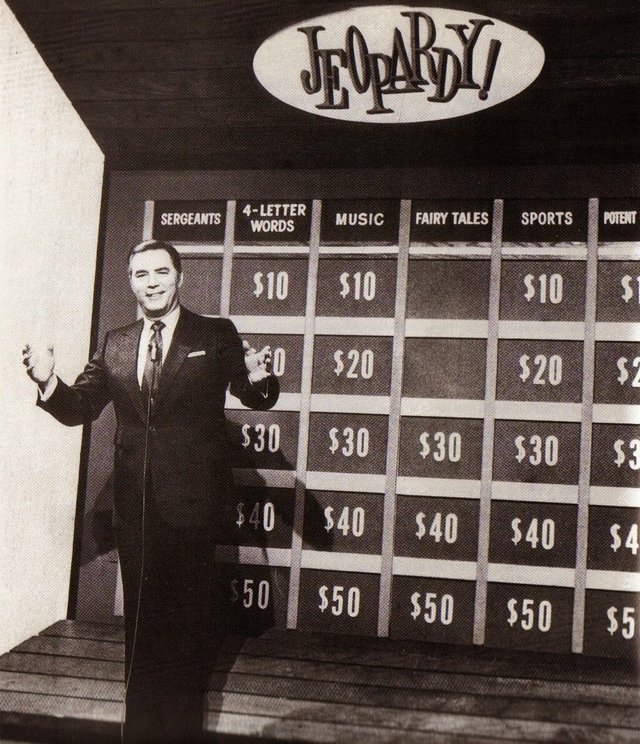

While the look of the show has certainly been updated, the basic gameplay remains the same today.

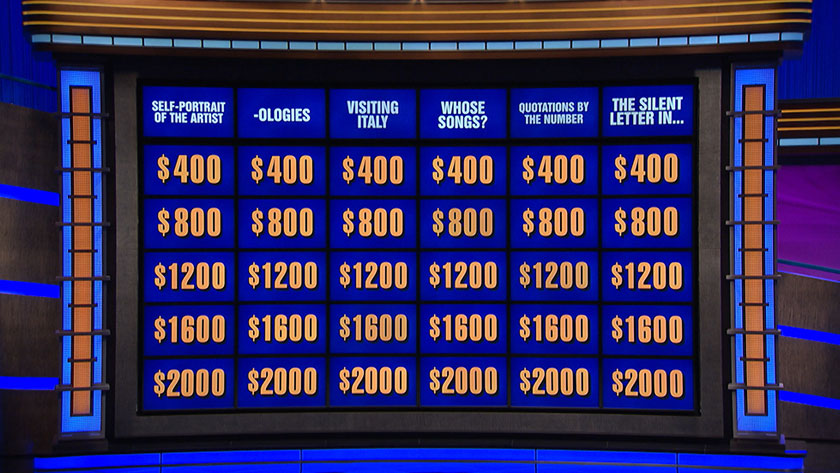

The game is divided into two rounds, followed by a culminating question called *Final Jeopardy!*. The first round, confusingly called *Jeopardy!* just like the name of the show, works in the same way as the second round, called *Double Jeopardy!*. A grid of 30 questions is displayed on the gameboard. The questions are arranged in 6 columns and 5 rows. Each column represents a category, and each row represents a dollar amount. Questions in higher rows are worth less than questions in lower rows, because they are presumably easier to answer. At the start of a round, only the categories are known to the three players. Questions are revealed one at a time in an order selected by the players. When a question is asked, players race to buzz in, and the first player to buzz in has an opportunity to answer. A correct response earns the player the dollar amount of the question, whereas an incorrect response loses the player that amount. Other players can then buzz in and attempt to answer. The person who answers correctly gets to choose the next question, and gameplay continues.

There are a small number of special questions in each round, called Daily Doubles. A Daily Double, unlike other questions, can only be answered by the player who uncovers it. Before seeing the question, the player wagers some portion of the money they have earned. If they get the question correct, they win the amount wagered, and if they get the question incorrect, they lose that amount.

Both rounds work in the same way, the only difference being that in the second round, the dollar amounts of each question on the gameboard are twice as much as the values in the first round, hence the name *Double Jeopardy!*. In addition, the first round has one Daily Double while the second round has two. Money earned in the first round carries into the second round, so players can start the second round with different amounts of money. Each round continues until a specified amount of time elapses or until all questions on the board have been asked. 

After two rounds of play, any players with a positive total get an opportunity to answer the last question, *Final Jeopardy!*. A category for this question is announced, then players get to wager any portion of their money without seeing the wagers of their competitors. The question is asked, and players simultaneously write down their answers. Then the answer is revealed, and players who answered correctly win the amount they wagered, while players who answered incorrectly lose the amount they wagered. At the end of the game, the player with the most money takes home the amount of money earned, and the other players take home small consolation prizes. The winner goes on to compete again in the next episode.

If you have never seen an episode of *Jeopardy!*, it would be a good idea to [watch one](https://www.youtube.com/watch?v=JabM0Ee8Zpk) to help clarify the decription given here. 

A dedicated group of fans maintains an extensive archive recording the details of *Jeopardy!* episodes, called the [J! Archive](http://www.j-archive.com/). The archive has over 369,000 questions recorded, and is often used as a resource for contestants to practice before their appearances. Since the archive is fan-maintained, and questions are transcribed by viewers, there are inevitably errors, but it is still a great source of data. 

We have data in five CSVs containing information on a large number of *Jeopardy!* games.  Run the next cell to read in the full CSVs and store the data in tables called `questions`, `trend`, `fj`, `locations`, and `contestants`.

In [ ]:
questions = Table.read_table('questions.csv')
trend = Table.read_table('trend.csv')
fj = Table.read_table('final_results.csv')
locations = Table.read_table('locations.csv')
contestants = Table.read_table('contestants.csv')

These tables are very large. Let's also extract the data corresponding to one particular game (`game_id` of 4680) so you can get a feel for how a game is represented without looking at the full tables. Run the next cell to extract information about game 4680.

In [ ]:
questions_4680 =questions.where('game_id', 4680)
trend_4680 = trend.where('game_id', 4680)
fj_4680 = fj.where('game_id', 4680)
locations_4680 = locations.where('game_id', 4680)
contestants_4680 = contestants.where('player_id', are.contained_in(locations_4680.column('player_id'))).sort('player_id', distinct=True)

The `questions_4680` table (and the `questions` table) has a row for each question, and information about the question and the episode it was a part of. Most columns are self-explanatory, but some things to note are:
* The `round` column contains "J" for the first round, "DJ" for the second round, and "final" for the *Final Jeopardy!* question.
* Rows are numbered 1 through 5 from top to bottom. Columns are numbered 1 through 6 from left to right.
* Some entries are `nan` which stands for 'not a number'. For example, the *Final Jeopardy!* question does not have a row or column on the gameboard. 
* Similarly, the *Final Jeopardy!* question's `value` is recorded as -1.

In [ ]:
questions_4680.show()

The `trend_4680` table (and the `trend` table) has a row for each question and describes the sequence of questions asked in a game. Note the following:
* The column `question_index` starts at 1, and tells you the order in which questions on the gameboard were revealed.
* The `correct_repsondent` is the person who answered the question correctly. If nobody answered the question correctly, it is recorded as `triple_stumper`. 
* The `clue_picker` is the person who selected that question from the gameboard. For Daily Doubles, this is the only person who gets a chance to answer.
* Players are denoted by their podium position. The returning champion always has the leftmost podium, and the other two players are placed at random at the center podium and rightmost podium.
* Most questions do not have a `wager`, but Daily Doubles do.
* *Final Jeopardy!* questions are not recorded here.
* This table does not include information about players who attempted to answer a question but got it wrong.

In [ ]:
trend_4680.show()

The `fj_4680` table (and the `fj` table) has a row for each contestant and describes how the contestants fared in *Final Jeopardy!*. For this table:
* The column `dj_score` gives the player's score at the end of round two (DJ) but before the *Final Jeopardy!* question is asked.
* `correct` is 1 if the player answered the *Final Jeopardy!* question correctly, and 0 otherwise. 
* Only players with a positive total after the second round participate in *Final Jeopardy!*. For example, in game 4680, the contestant at the middle podium did not get to wager or answer the *Final Jeopardy!* question.
* The `coryat_score` will not be used in our analysis, but it represents [a player's score if all wagering was disregarded](http://www.j-archive.com/help.php#coryatscore). It is mainly used as a measurement for viewers at home to compare themselves to contestants. 

In [ ]:
fj_4680.show()

The `locations_4680` table (and the `locations` table) gives the `player_id` associated with the player at each podium.

In [ ]:
locations_4680

The `contestants_4680` table (and the `contestants` table) has a row for each contestant in each game. The table gives the `player_id` as well as name and personal information about each contestant. Note that in the full `contestants` table, there are duplicate rows for contestants who appear on multiple episodes.

In [ ]:
contestants_4680

At this point, you should know a lot about what happened in game 4680 of *Jeopardy!*. You can learn even more about [game 4680 on the J! Archive](http://www.j-archive.com/showgame.php?game_id=4680). Referring to the J! Archive can be a convenient way to spot-check your code. Keep this in mind as you work through the project. 

Notice that the J! Archive refers to game 4680 as "Show #6904", and not by its `game-id` of 4680. You can find the `game_id` of this episode if you look in the URL. The `game_id` is the only identifier we will use to refer to episodes, never the show number. You can find the J! Archive page for a different game by changing the `game_id` in the URL. 

Now that we have our data, let's start looking at it and answering some questions about it. The entire project should use the data for **all games**, not just game 4680. Game 4680 was just an example to illustrate what each table records.

**Question 1.** You can get a pretty good sense of the types of questions that are often asked on *Jeopardy!* by looking at the most common answers. Create an array called `most_common_answers` containing the twenty answers that appear in our data set most frequently, arranged in order of decreasing frequency.

In [ ]:
most_common_answers = ...
most_common_answers

In [ ]:
_ = ok.grade('q1_1')

*Jeopardy!* is played in two rounds, and the dollar values of the second round (DJ) are twice the dollar values of first round (J). Are questions worth more in the second round because of a difference in the type of question asked? Perhaps the questions in the second round are more difficult or more obscure than those in the first round. Since questions are organized into categories, let's explore whether there is any difference in the kinds of categories that appear in the first round (J) versus the second round (J). 

**Question 2.** Make a table called `comparison table` that has a row for each category that was used in the first or second round of a game in our dataset. The table should have three columns, `category`, `J`,  and `DJ`, giving the name of the category, the number of games for which that category was used in the first round (J), and the number of games for which that category was used in the second round (DJ). 

*Hint:* Review the textbook section on [cross-classifying by more than one variable](https://www.inferentialthinking.com/chapters/08/3/Cross-Classifying_by_More_than_One_Variable.html) if you are having trouble.

In [ ]:
comparison_table = ...
comparison_table

In [ ]:
_ = ok.grade('q1_2')

**Question 3.** For each category, we can calculate the difference between the number of times the category was used in round two (DJ) and the number of times the category was used in round one (J). Higher values of this difference represent categories that are most representative of round two (DJ) and lower values of this difference represent categories that are most representative of round one (J).

Create two arrays `most_dj` and `most_j` containing the 20 categories most representative of round two (DJ) and round one (J), respectively.

In [ ]:
most_dj = ...
most_dj

In [ ]:
_ = ok.grade('q1_3')

**Question 4.** Based on the categories most representative of each round, does it seem like the second round questions are suited to a more educated audience? Set `q_1_4_answer` to True or False.

In [ ]:
q_1_4_answer = ...

In [ ]:
_ = ok.grade('q1_4')

In 2004, *Jeopardy!* contestant Ken Jennings made history by winning 74 consecutive games and over 2.5 million dollars. Since then, Jennings has appeared in several more games for various special events, such as tournaments for prior *Jeopardy!* champions. Jennings has multiple different `player_id`s because of these repeat appearances, but he is the only person in the dataset named Ken Jennings. His hometown and occupation have changed because after winning so much money on *Jeopardy!*, he quit his day job as a software engineer and moved to a new state.

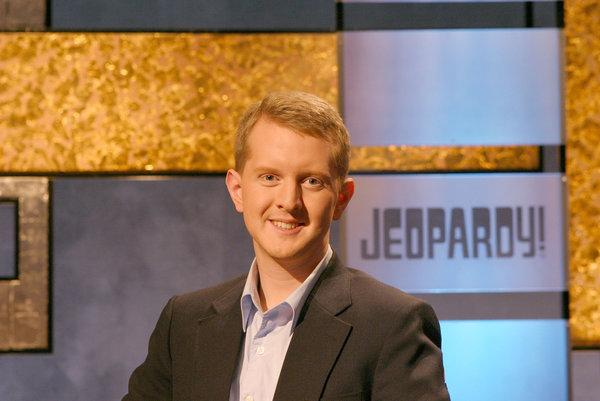

**Question 5.** Create a table called `jennings_opponents` containing only the rows of `contestants` that correspond to contestants that have competed against Ken Jennings. The table should not have duplicate `player_id`s, so if a player competed against Jennings multiple times with the same `player_id`, they will only appear once in the table. If a player competed against Jennings multiple times with different `player_id`s, then they will appear multiple times, once for each `player_id`.

*Hint:* It might help you to look at the code for how the table `contestants_4680` was created.

In [ ]:
jennings_opponents = ...
jennings_opponents

One of Jennings's opponents was the supercomputer Watson, "a deep question answering system" designed by IBM. Watson vastly outperformed his human opponents in an impressive demonstration of the capabilities of artificial intelligence.

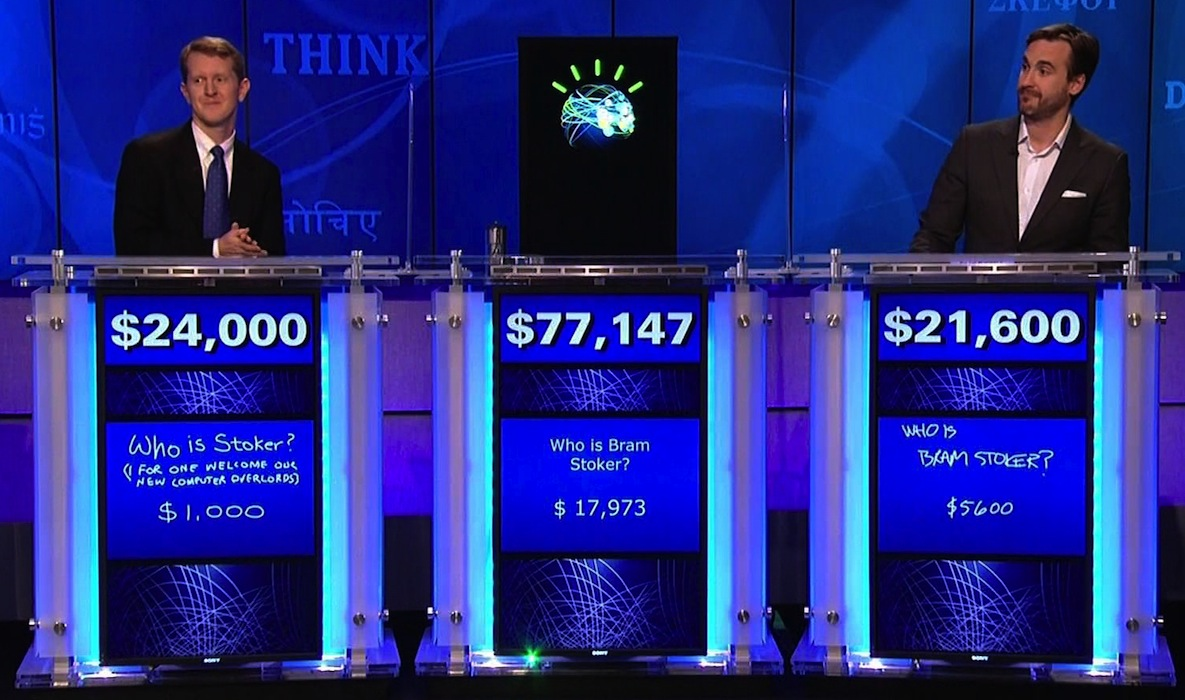

Another one of Jennings's opponents was Roger Craig, a living breathing data scientist. Craig is also famous for his *Jeopardy!* success and has appeared in many games and tournaments. In particular, Craig held the record for the largest single-game earnings for nearly ten years, until it was broken very recently by the newest *Jeopardy!* sensation, James Holzhauer.

To prepare for his tournament appearances, Craig used data science to analyze his own *Jeopardy!* knowledge and develop a system to learn new content efficiently. From a database of *Jeopardy!* questions and answers scraped from the J! Archive, he clustered questions by topic, assessed his knowledge in each topic as compared to the relative importance of each topic, and used this information to optimize his learning by identifying the content areas in which he had the most to gain. If you want to learn more about the methods Craig employed in his "Knowledge Tracking" tool, he explains his project in a 15 minute [video](https://vimeo.com/29001512). This is a great example of data science in action!

In this final project, we'll use tools from data science not to improve our own personal performance on the gameshow, but to answer questions about the gameshow based on data. We will address the following questions in the remainder of this project:

* **Part 2:** Do people who get the *Final Jeopardy!* question correct earn more money in the first two rounds than those who get the *Final Jeopardy!* question wrong?
* **Part 3:** Are very difficult questions distributed across the game board in the same way for both rounds? Are they distributed evenly through the columns?
* **Part 4:** How much money do the producers of the show need to budget, so that they have enough to pay the contestants with high probability?
* **Part 5:** Is it possible to strategically hunt for Daily Doubles, and is such a strategy useful?

## Part 2. *Final Jeopardy!* Results

Let's investigate the results of the *Final Jeopardy!* round. Remember that our data in the `fj` table includes information for contetstants who did not actually participate in this round, because they did not have a positive total afer the first two rounds. Some entries in the `fj` table will be stored as `nan` which stands for "not a number." We saw an example of this in game 4680.

In [ ]:
fj_4680

To keep only the rows without `nan` values, we have to use a special trick. Due to the way `nan` values are stored, the most straightforward where command won't work.

In [ ]:
fj_4680.where('correct', are.not_equal_to('nan'))

Try removing the quotes around 'nan' to see if that makes things any better.

Instead, we'll use this trick to eliminate `nan` rows:

In [ ]:
fj_4680.where('correct', are.above(-1))

Now that we know how to extract the relevant data, let's return to the question of investigating *Final Jeopardy!* results across all games. You may be surprised to learn that the proportion of times a contestant answers the *Final Jeopardy!* question correctly is very close to 1/2. 

In [ ]:
fj_results = fj.where('correct', are.above(-1))
fj_results.where('correct', 1).num_rows/fj_results.num_rows

In other words, it's almost like the probability of a person getting the *Final Jeopardy!* question is determined by the flip of a fair coin. However, answering a *Final Jeopardy!* question is not like flipping a coin, because answering a question is based on skill (knowledge) in addition to luck (whether the question that's asked is something you know). Therefore, it makes sense that contestants who do well in the gameplay of the first two rounds may be more knowledgeable and more likely to answer the *Final Jeopardy!* correctly. 

Let's try to determine whether the correctness of the response to the *Final Jeopardy!* question is associated with how much money a player earns during the first two rounds. Do people who get the *Final Jeopardy!* correct have a different distribution of money earned than people who get the *Final Jeopardy!* wrong?   

**Question 1.** Generate an overlaid histogram that allows us to visually compare the distributions of money earned in the first two rounds by players who got the *Final Jeopardy!* correct and those who didn't.

In [ ]:
# Generate your histogram here


The distributions in the overlaid histogram look very similar, but not exactly the same. Are the differences in the distributions due to chance variation or to more substantial differences between contestants who answer the *Final Jeopardy!* correctly and those who answer incorrectly? Let's do an A/B test with the following hypotheses:

**Null Hypothesis**: In the population of *Jeopardy!* contestants, the distribution of money earned in the first two rounds is the same for those who answer the *Final Jeopardy!* correctly and incorrectly.

**Alternative Hypothesis**: In the population of *Jeopardy!* contestants, those who get the *Final Jeopardy!* correct make more money on average in the first two rounds of the game than those who get the *Final Jeopardy!* incorrect.

We will use as our test statistic the difference between the mean amounts of money earned in the first two rounds by those who got the *Final Jeopardy!* correct and incorrect.

**Question 2.** Calculate the observed value of the test statistic and save the result as `observed_difference`. 

In [ ]:
observed_difference = ...
observed_difference

In [ ]:
_ = ok.grade('q2_2')

In order to determine whether this observed difference in means is large enough to indicate a difference between the groups, we need context. In particular, we need to see how the statistic would vary under the assumptions of the null hypothesis. If the null hypothesis is true, this means that the distribution of money earned for people who got the *Final Jeopardy!* correct is the same as the distribution of money earned for people who got the *Final Jeopardy!* wrong. This means that if we shuffle the labels (correct/incorrect) associated with each amount of money earned, the averages of the two groups should come out about the same.

**Question 3.**  Shuffle the labels (correct/incorrect) associated with each amount of money earned, then calculate the test statistic and save the result as `shuffled_difference`.

In [ ]:
shuffled_difference = ...
shuffled_difference

**Question 4.** Now we need to try many different shuffles to see how the test statistic might have come out. Complete the function below, which takes as input a table of the same form as `fj_results` and a number of test statistics to simulate, and returns an array of that many simulated values of the test statistic. 

In [ ]:
def simulate_differences(table, repetitions):
    differences = ...
    for i in ... :
        ...
    return ...

CONVERT TO MARKDOWN BEFORE SUBMITTING: BEGIN
<hr style="color:Green;background-color:Green;border:0 none; height: 10px;">

Run the cell below to try out your function by calling it with only ten repetitions. Make sure the results seem reasonable.

In [ ]:
simulate_differences(fj_results, 10)

Now, let's make sure your code is efficient. The following cell times how long it takes for your code to simulate one hundred values of the test statistic, and prints out the total time in seconds. Make sure it takes less than **30 seconds.**

In [ ]:
import datetime as dt

before = dt.datetime.now()

simulate_differences(fj_results, 100)

after = dt.datetime.now()

(after-before).total_seconds()

Now, use your function to simulate 1000 values of the test statistic, and store the results in the array `differences`. This may take a few minutes.

In [ ]:
differences = ...

In [ ]:
_ = ok.grade('q2_4')

The next cell plots a histogram of the test statistics stored in `differences` as well as a red dot for `observed_difference`.

In [ ]:
Table().with_column('Difference Between Group Means', differences).hist(bins=20)
plots.title('Prediction Under the Null Hypothesis');
plots.scatter(observed_difference, 0, color='red', s=30);

<hr style="color:Green;background-color:Green;border:0 none; height: 10px;">
CONVERT TO MARKDOWN BEFORE SUBMITTING: END

**Question 5.** Based on the results of this test, would you reject the null hypothesis? Set `reject_null` to be True or False.

In [ ]:
reject_null = ...

In [ ]:
_ = ok.grade('q2_5')

## Part 3. Triple Stumpers

A question that no player answers correctly is called a *triple stumper*. For example, in game 4680, the question in row 5 and column 3 of the first round (J) was a triple stumper.

In [ ]:
trend_4680

What was this question that nobody could answer correctly?

In [ ]:
questions_4680.where('row', 5).where('column', 3).where('round', 'J').column('question_text').item(0)

Would you have gotten it right? Let's see what the answer was.

In [ ]:
questions_4680.where('row', 5).where('column', 3).where('round', 'J').column('answer').item(0)

It seems reasonable to expect that triple stumpers would occur more frequently among higher-valued questions, or those in lower rows of the gameboard. Let's see if that is the case. 

**Question 1.**  Create an array `triple_stumpers_by_row_j` that contains the proportion of all triple stumpers in the first round (J) that appeared in each row of the game board from top to bottom. Similarly, create an an array `triple_stumpers_by_row_dj` that contains the analogous proportions for round two (DJ).


In [ ]:
triple_stumpers_by_row_j = ...
triple_stumpers_by_row_j

In [ ]:
_ = ok.grade('q3_1')

**Question 2** Does the data seem to indicate that higher valued questions are more likely to be triple stumpers? Set `q_3_2_answer` to your answer choice.

1. No, in both rounds.  
2. Yes, in both rounds.  
3. Yes in the first round, no in the second round.  
4. No in the first round, yes in the second round.  

In [ ]:
q_3_2_answer = ...

In [ ]:
_ = ok.grade('q3_2')

The arrays we calculated in question 1, `triple_stumpers_by_row_j` and `triple_stumpers_by_row_dj` represent the distribution of triple stumpers across the rows of the game board, by round. Compare the values in these two arrays. You should find that the values are very close, suggesting that the distribution of triple stumpers across the rows is similar in the first round (J) and second round (DJ). Let's explore whether this is true by performing an A/B test. 

We'll use the following null and alternative hypotheses:

**Null Hypothesis:** The distribution of triple stumpers in the rows of round one (J) is the same as the distribution of triple stumpers in the rows of round two (DJ).

**Alternative Hypothesis:** The distribution of triple stumpers in the rows of round one (J) is different from the distribution of triple stumpers in the rows of round two (DJ).

As our test statistic, we will use the total variation distance (TVD) between two distributions.

**Question 3.** What values of the test statistic support the alternative hypothesis?  Set `q_3_3_answer` to your answer choice.
1. High values  
2. Low values  
3. Both high and low values
4. Moderate values

In [ ]:
q_3_3_answer = ...

In [ ]:
_ = ok.grade('q3_3')

**Question 4.** What is the observed value of the test statistic? Save your answer as `row_dist_observed_statistic`.

In [ ]:
row_dist_observed_statistic = ...
row_dist_observed_statistic

Now that we have defined hypotheses and a test statistic, we are ready to conduct a hypothesis test. We'll start by defining a function to simulate the test statistic under the null hypothesis, and then use that function 1000 times to understand the distribution of the test statistic under the null hypothesis.

**Question 5.** Write a function to simulate the test statistic under the null hypothesis. The `simulate_row_dist_null` function should simulate the null hypothesis *once* (not 1000 times) and return the value of the test statistic for that simulated sample.

*Hints and Advice:*  
* Remember, this is an A/B test.
* Simulate a new sample (should it be with replacement or not?)
* Think about what you want to change and what you want to keep the same as you generate this new sample.
* Start by making a table of only the rows and columns you need to do your analysis, which should be defined outside the function. This will probably involving a where command to keep only the relevant rows, and select or drop to keep only the relevant columns. Make sure your table is as small as possible in both rows and columns. 
* Inside the function, do your sampling from this smaller table, and try not to use where commands or additional for loops, which take a long time. Instead, try using group or np.count_nonzero when possible.

In [ ]:
# Start by creating a table with only the rows and columns you need to perform the A/B test.


In [ ]:
def simulate_row_dist_null():
    # Fill in the body of the function
    ...

In [ ]:
# Call the function. Do not change this cell.

simulate_row_dist_null()

In [ ]:
_ = ok.grade('q3_5')

**Question 6.** Fill in the blanks below to complete a function that performs a specified number of simulations for the hypothesis test  and returns an array of that many simulated values of the test statistic.

*Hint*: You should use the function you wrote above in Question 5.

In [ ]:
def row_dist_simulation(repetitions):
    ...

CONVERT TO MARKDOWN BEFORE SUBMITTING: BEGIN
<hr style="color:Green;background-color:Green;border:0 none; height: 10px;">

Run the cell below to try out your function by calling it with only ten repetitions. Make sure the results seem reasonable.

In [ ]:
row_dist_simulation(10)

Now, let's make sure your code is efficient. The following cell times how long it takes for your code to simulate one hundred values of the test statistic, and prints out the total time in seconds. Make sure it takes less than **120 seconds.** If it's taking too long, it's likely a problem with the previous question, 3.5.

In [ ]:
import datetime as dt

before = dt.datetime.now()

row_dist_simulation(100)

after = dt.datetime.now()

(after-before).total_seconds()

Now, use your function to compute 500 values of the test statistic under the null hypothesis and store the result in the array `row_dist_simulated_stats`.

*Warning:* This could take ten minutes to complete. 

In [ ]:
row_dist_simulated_stats = row_dist_simulation(500)

In [ ]:
_ = ok.grade('q3_6')

The following cell will plot the histogram of the simulated test statistics, as well as a point for the observed test statistic.

In [ ]:
Table().with_column('Simulated TVDs', row_dist_simulated_stats).hist()
plots.title('Prediction Under the Null Hypothesis');
plots.scatter(row_dist_observed_statistic, 0, color='red', s=30);

<hr style="color:Green;background-color:Green;border:0 none; height: 10px;">
CONVERT TO MARKDOWN BEFORE SUBMITTING: END

**Question 7.** Which is the best interpretation of the results of this test? Set `q_3_7_answer` to your answer choice.
1. Even though the distribution of triple stumpers across rows was slightly different in the first round (J) and second round (DJ), the differences most likely were due to random chance and do not reflect any significant difference in the distribution of triple stumpers across rows in each round.
2. The seemingly slight difference between the distribution of triple stumpers across rows in the first round (J) and second round (J) is actually substantial and points to a significant difference in the distribution of triple stumpers across rows in each round.
3. It is hard to tell whether there is a meaningful difference in the distribution of triple stumpers across rows in each round. Different people might interpret these same results differently.

In [ ]:
q_3_7_answer = ...

In [ ]:
_ = ok.grade('q3_7')

While the rows of the game board represent different dollar amounts and different question difficulties, the columns of the game board do not have any particular meaning. So we might wonder whether all columns of the game board are equally likely to have triple stumpers. We can figure out whether this is the case with a hypothesis test as follows:

**Null Hypothesis**: Triple stumpers are distributed uniformly through the six columns. 

**Alternative Hypothesis**: Triple stumpers are more likely to be in certain columns than others.

Our test statistic will be the total variation distance between the distribution of triple stumpers by column and the expected distribution of triple stumpers by column.

**Question 8.** Create a histogram that shows the empirical distribution of triple stumpers by column. Your histogram should have one bin per column.

In [ ]:
# Generate your histogram here


**Question 9.** Generate a histogram of the theoretical probability distribution under the null hypothesis. Your histogram should have one bin per column.

In [ ]:
# Generate your histogram here


**Question 10.** You should find that the distributions displayed in the two histograms above are similar, but not exactly the same. Quantify the difference in these distributions by calculating the total variation distance between the distributions, and save your result as `column_dist_observed_statistic`.

In [ ]:
column_dist_observed_statistic = ...
column_dist_observed_statistic

In [ ]:
_ = ok.grade('q3_10')

**Question 11.** Now calculate the total variation distance between the distribution of columns in a single random sample drawn uniformly from the possible columns and the theoretical distribution. Save your result as `column_dist_simulated_stat`

In [ ]:
column_dist_simulated_stat = ...
column_dist_simulated_stat

In [ ]:
_ = ok.grade('q3_11')

**Question 12.** Fill in the blanks below to complete the simulation for the hypothesis test. Your simulation should compute 10000 values of the test statistic under the null hypothesis and store the result in the array `column_dist_simulated_stats`.

In [ ]:
column_dist_simulated_stats = ...
repetitions = 10000
for i in np.arange(repetitions):
    # Fill in the body of the loop
    ...

The following cell will plot the histogram of the simulated test statistics, as well as a point for the observed test statistic.

In [ ]:
Table().with_column('Simulated statistics', column_dist_simulated_stats).hist(bins = np.arange(0, 0.026, 0.001))
plots.title('Prediction Under the Null Hypothesis');
plots.scatter(column_dist_observed_statistic, 0, color='red', s=30);

**Question 13.** Is the histogram above roughly bell-shaped because of the Central Limit Theorem? Set `q_3_13_answer` to `True` if you think the Central Limit Theorem is at play here, or `False` if you think not.

In [ ]:
q_3_13_answer = ...

In [ ]:
_ = ok.grade('q3_13')

The results of our hypothesis test indicate that triple stumpers *are* more likely to be in certain columns than others, which is somewhat surprising. However, keep in mind that in order to be a triple stumper, a question needs to have been selected by some player during the game. The gameplay is limited by time, so a game can end before all questions on the board are asked. There could be some very difficult questions that would have stumped everyone, but just were never asked in the game. 

Thus, it is a possibility that the very difficult questions (the triple stumpers and those that would have stumped all players but were never asked) could actually be distributed uniformly through the columns, while the ones that get asked (the triple stumpers) are non-uniformly distributed because players tend to choose certain columns more than others. For example, if players tend to choose questions in column 1 more often than they tend to choose questions in other columns, then we would expect to see a higher incidence of triple stumpers in column 1 because there are simply more questions asked from column 1.

Therefore, let's consider not whether the columns seem to be chosen at random from the uniform distribution, but whether they seem to be chosen at random from the distribution of column numbers of the questions asked during gameplay.

**Question 14.** Create an array called `asked_column_dist` that contains, for each column, the proportion of all asked questions that come from that column.

In [ ]:
asked_column_dist = ...
asked_column_dist

In [ ]:
_ = ok.grade('q3_14')

**Question 15.** Perform a hypothesis test to determine whether the column numbers of triple stumpers seem to be chosen at random from the distribution of columns of asked questions.

*Hint:* You should be able to use most of your code from questions 10, 11 and 12, with minor modifications.

In [ ]:
# Write the code for your hypothesis test here


Use the results of your hypothesis test to determine whether the column numbers of triple stumpers seem to be chosen at random from the distribution of columns of asked questions and set the variable `chosen_randomly_from_asked` to be True or False.

In [ ]:
chosen_randomly_from_asked = ...

In [ ]:
_ = ok.grade('q3_15')

**Question 16.** Perform a hypothesis test to determine whether the column numbers of asked questions are distributed uniformly across all six columns, or whether *Jeopardy!* players tend to favor certain columns.

*Hint:* You should be able to use most of your code from questions 10, 11 and 12, with minor modifications.

In [ ]:
# Write the code for your hypothesis test here


Which is the best interpretation of the results of this hypothesis test?
1. The observed statistic is similar to many of the simulated statistics. This suggests that the null hypothesis is true.
2. The observed statistic is similar to many of the simulated statistics. This suggests that the alternative hypothesis is true.
3. The observed statistic is smaller than the simulated statistics. This suggests that the null hypothesis is true.
4. The observed statistic is smaller than the simulated statistics. This suggests that the alternative hypothesis is true.  
5. The observed statistic is larger than the simulated statistics. This suggests that the null hypothesis is true.
6. The observed statistic is larger than the simulated statistics. This suggests that the alternative hypothesis is true.  

In [ ]:
q_3_16_answer = ...

In [ ]:
_ = ok.grade('q3_16')

## Part 4. Budgeting for Prizes

Contestants on *Jeopardy!* accrue money as they play, but only the winner at the end of the game actually takes home the money they earned in gameplay. The other two players get consolation prizes for their participation, and to help cover the costs of their expenses to be on the show, such as traveling to Los Angeles for filming. The consolation prizes are 
* two thousand dollars for the second-place contestant and 
* one thousand dollars for the third-place contestant.

The amount of money that the gameshow needs to pay out to contestants each episode varies, because the winner's earnings vary based on the gameplay. In this section, we will estimate how much money the gameshow should budget for prizes in each episode.

Throughout this section, we will assume that exactly one of the three contestants takes home their money earned. This is the person with the most earnings or one of the people with the most earnings if there is a tie. On the show, the winner in the case of a tie is determined by a tiebreaker question. The other two contestants take home a total of three thousand dollars, for the second and third place prizes combined.

This means that surprising things can and do happen when all contestants perform poorly. For example, look at what happened in game 4074.

In [ ]:
fj.where('game_id', 4074)

All contestants wagered their earnings in full during *Final Jeopardy!*, and all of them got the *Final Jeopardy!* question wrong, so each of them earned zero dollars. In this situation, tiebreaker questions would determine the unique winner, who would win no money, a second-place winner, who would win two thousand dollars, and a third-place winner, who would win one thousand dollars. While it is certainly strange that the "winner" goes home with less money than the losers, keep in mind that the winner goes on to participate in the next episode, where they have a chance to earn a lot of money. The prize is really the potential to go on and earn more through gameplay. And eventually, every contestant loses, at which point they leave with one of the consolation prizes, so everybody who plays on *Jeopardy!* makes at least one thousand dollars.

A piece of *Jeopardy!* history is relevant to our budgeting analysis. Over time, the dollar amounts associated with questions have risen substantially. In the picture from 1964 at the top of this notebook, questions were valued at 10, 20, 30, 40, and 50 dollars. The most recent increase in dollar amounts happened in the middle of season 18, so for this part of the project, we will only consider games **after season 18**.

**Question 1.** Write a function called `earned` that takes as input three integers:  
    * `before`, the amount of money a player has after the first two rounds but before *Final Jeopardy!*
    * `wager`, the amount of money wagered for *Final Jeopardy!*  
    * `correct`, 1 if the player got the *Final Jeopardy!* correct, 0 otherwise  
and returns the amount of money the player has after *Final Jeopardy!*. This is the amount earned in gameplay, not necesarily the amount the player takes home.

In [ ]:
def earned(before, wager, correct):
    # Fill in the body of the function
    ...

In [ ]:
_ = ok.grade('q4_1')

**Question 2.** Calculate the average budget of each game after season 18 and store your result as `average_budget`. The budget of a game is the total amount of money taken home by all players in the game. 

In [ ]:
average_budget = ...
average_budget

In [ ]:
_ = ok.grade('q4_2')

You should find that the average budget is around $23400 for this set of *Jeopardy!* games, but let's see how different the average budget could have been in another sample of *Jeopardy!* games. Unfortunately, we don't have another sample of *Jeopardy!* games available, but we can use the boostrap to simulate having more samples. 

**Question 3.** Complete the function `bootstrap_budget`, which should use bootstrapping to repeatedly resample from our dataset and compute the average budget of each resample. The function should return an array containing the average budget of each resample.

*Advice:* Start out by creating a table with only the rows and columns that you absolutely need to do your analysis.

In [ ]:
def bootstrap_budget(replications):
    # First start with a table that is as small as possible
    budget_table = ...
    
    average_budgets = make_array()
    
    # Fill in the rest of this function      
    
    return average_budgets

Run the cell below to try out your function by calling it with only ten repetitions. Make sure the results seem reasonable.

In [ ]:
example_output = bootstrap_budget(10)
example_output

Now, let's make sure your code is efficient. The following cell times how long it takes for your code to simulate one thousand values of the test statistic, and prints out the total time in seconds. Make sure it takes less than **10 seconds.** 

In [ ]:
import datetime as dt

before = dt.datetime.now()

bootstrap_budget(1000)

after = dt.datetime.now()

(after-before).total_seconds()

Run the cell below to calculate ten thousand bootstrapped averages and display a histogram of the results

In [ ]:
bootstrap_averages = bootstrap_budget(10000)
bootstrap_table = Table().with_column('Bootstrap Sample Average Budget', bootstrap_averages)
bootstrap_table.hist(bins=20)


In [ ]:
_ = ok.grade('q4_3')

**Question 4.** Is the histogram above roughly bell-shaped because of the Central Limit Theorem? Set `q_4_4_answer` to `True` if you think the Central Limit Theorem is at play here, or `False` if you think not.

In [ ]:
q_4_4_answer = ...

In [ ]:
_ = ok.grade('q4_4')

**Question 5.** Run the next cell. The output of this cell will depend on randomness, so you might get a different answer if you recalculate `bootstrap_averages`.

In [ ]:
np.count_nonzero(bootstrap_averages>24000)

Suppose you were to run the cell above and it produced an output of 1. Interpret what that would mean and set `q_4_5_answer` to match the best interpretation below:

1. The probability that a game exceeds a budget of 24 thousand dollars is about 1 in ten thousand.
2. The probability that a game exceeds a budget of 24 thousand dollars is at most 1 in ten thousand.
3. The probability that the average budget for all games is over 24 thousand dollars is about 1 in ten thousand.
4. The probability that the average budget for all games is over 24 thousand dollars is at most 1 in ten thousand.

In [ ]:
q_4_5_answer = ...

In [ ]:
_ = ok.grade('q4_5')

**Question 6.** Set `left` and `right` to be the left and right endpoints of a 99% confidence interval for the average budget of a *Jeopardy!* game.

In [ ]:
left = ...
right = ...
left, right

In [ ]:
_ = ok.grade('q4_6')

# Part 5: Daily Doubles

In 2014, a successful *Jeopardy!* contestant named Arthur Chu became widely known and villainized for his strategy, which critics touted as unsporstmanlike and aggressive. Arthur Chu was criticized for trying to cram in as many questions as possible by clicking his buzzer wildly and for interrupting or correcting the host, Alex Trebek. 

*"They say, watching me, that I’m not very calm and chill about clicking. I don’t look like a normal person. I’m clicking every time Alex says something like I’m one of Pavlov’s dogs." - Arthur Chu*

More people, however, were unsettled by his strategy of selecting questions. Rather than the more traditional standard *Jeopardy!* approach of selecting a category, then working through all questions in that category in increasing order of dollar value, Chu's style involved jumping all around the gameboard, partially to confuse his opponents but primarily to hunt for the Daily Doubles. In order for this strategy to be advantageous, Chu would have had to have some knowledge of where the Daily Doubles were likely to be. In particular, this strategy only makes sense if some cells of the gameboard are more likely to have Daily Doubles than others. Let's test if this is true, using the following hypotheses:

**Null Hypothesis:** In the first round (J), Daily Doubles are distributed uniformly through the game board.

**Alternative Hypothesis:** In the first round (J), Daily Doubles are not distributed uniformly through the game board. Some cells are more likely than others to have Daily Doubles.

For this part of the project, we will only consider Daily Doubles in the **first round** of the game (J).

As our test statistic, we will use the maximum proportion of Daily Doubles on any cell on the game board. 


**Question 1.** This choice of test statistic is not unique. Which of the following test statistics could we have used instead? There may be more than one correct answer.

1. The proportion of Daily Doubles on one particular cell on the game board.
2. The minimum proportion of Daily Doubles on any cell on the game board.
3. The maximum proportion of Daily Doubles on any cell plus the minimum proportion of Daily Doubles on any cell.
4. The average proportion of Daily Doubles on each cell.
5. The sum of all proportions of Daily Doubles on each cell.
6. The sum of all differences between the observed and expected proportion of Daily Doubles on each cell.
7. The sum of all absolute differences between the observed and expected proportion of Daily Doubles on each cell.
8. Total variation distance between the distribution of Daily Doubles across cells and the uniform distribution.


Set `q_5_1_answer` to a list of numbers 1 through 8 corresponding to the test statistic(s) that would be suitable for this hypothesis test.

In [ ]:
q_5_1_answer = [ ]

In [ ]:
_ = ok.grade('q5_1')

**Question 2.** As our test statistic, we will use the maximum proportion of Daily Doubles on any cell on the game board. What values of this test statistic support the alternative hypothesis?  Set `q_3_3_answer` to your answer choice.

1. High values  
2. Low values  
3. Both high and low values
4. Moderate values

In [ ]:
q_5_2_answer = ...

In [ ]:
_ = ok.grade('q5_2')

**Question 3.** Calculate the observed value of the test statistic and save your result as `observed_max_prop`.

In [ ]:
observed_max_prop = ...
observed_max_prop

**Question 4.** Complete the function below to calculate one simulated value of the test statistic under the assumptions of the null hypothesis. 

In [ ]:
def one_simulated_max_prop():
    # Fill in the body of this function to calculate one value of the test statistic under the null hypothesis
    ...

In [ ]:
one_simulated_max_prop()

The function below generates many values of the test statistic.

In [ ]:
def simulate_max_props(repetitions):
    max_props = make_array()
    for i in np.arange(repetitions):
        max_props = np.append(max_props, one_simulated_max_prop())  
    return max_props

CONVERT TO MARKDOWN BEFORE SUBMITTING: BEGIN
<hr style="color:Green;background-color:Green;border:0 none; height: 10px;">

Run the cell below to generate ten values of the test statistic. Make sure the results seem reasonable.

In [ ]:
simulate_max_props(10)

Now, let's make sure your code is efficient. The following cell times how long it takes for your code to simulate one thousand values of the test statistic, and prints out the total time in seconds. Make sure it takes less than **60 seconds.** 

In [ ]:
import datetime as dt

before = dt.datetime.now()

simulate_max_props(100)

after = dt.datetime.now()

(after-before).total_seconds()

The next cell displays a histogram of the simulated statistics. This may take several minutes to run.

In [ ]:
Table().with_column('Simulated Maximum Proportion', simulate_max_props(500)).hist(bins=20)
plots.title('Prediction Under the Null Hypothesis');
plots.scatter(observed_max_prop, 0, color='red', s=30);

In [ ]:
_ = ok.grade('q5_4')

<hr style="color:Green;background-color:Green;border:0 none; height: 10px;">
CONVERT TO MARKDOWN BEFORE SUBMITTING: END

**Question 5.** The results of your hypothesis test should point towards the alternative hypothesis, which says that certain cells of the gameboard are more likely to have Daily Doubles than others. According to our dataset, which cells are most likely to have a Daily Double in the first round? Create a table called `daily_double_coordinates` that has a column called `row` and a column called `column` and contains the coordinates of the ten cells on the gameboard most likely to have a Daily Double in the first round. Order the rows in order of decreasing likelihood, so the first row represents the cell most likely to have a Daily Double.

In [ ]:
daily_double_coordinates = ...
daily_double_coordinates

In [ ]:
_ = ok.grade('q5_5')

**Question 6.** IBM's computer system, Watson, played in one game that is recorded in our dataset. Find this game and make a table called `watson_coordinates` containing the coordinates of the first ten questions picked *by Watson* in this game. Your table should have a column called `row` and a column called `column`, and should contain ten rows, ordered in the same order that Watson selected the questions in the game.

In [ ]:
watson_coordinates = ...
watson_coordinates

In [ ]:
_ = ok.grade('q5_6')

A comparison of `daily_double_coordinates` and `watson_coordinates` should convince you that Watson employed the same Daily Double hunting strategy as Arthur Chu. Ken Jennings, the record-setting *Jeopardy!* champion, who was destroyed by Watson, says:

*"I was converted to Daily Double hunting during my 2011 match against the IBM supercomputer Watson. During a practice round, Watson took the clues in order, like a good citizen; I won the game in a runaway. But during the televised match, Watson’s minders switched it into “game mode,” which of course involved smart strategies like hunting for Daily Doubles. This time, Watson roared into a huge lead. I had a chance to come back near the end of the match when I found the first Daily Double in the round—but my next clue selection wasn’t quite the optimal one, and Watson found the second Daily Double instead. Lights out."*

The most recent *Jeopardy!* superstar, James Holzhauer, broke records by employing the Daily Double hunting strategy alongside another strategy called value building, which means he went for the higher value questions first to build up his stockpile of money, allowing him to wager more when he did find the Daily Doubles. Holzhauer, a professional sports gambler, is comfortable making large wagers, so Daily Doubles often gave him a big lead over his competitors. The combination of value building, Daily Double hunting, and aggressive wagering have worked out very well for Holzhauer. To see how well, compare his performance to Ken Jennings.

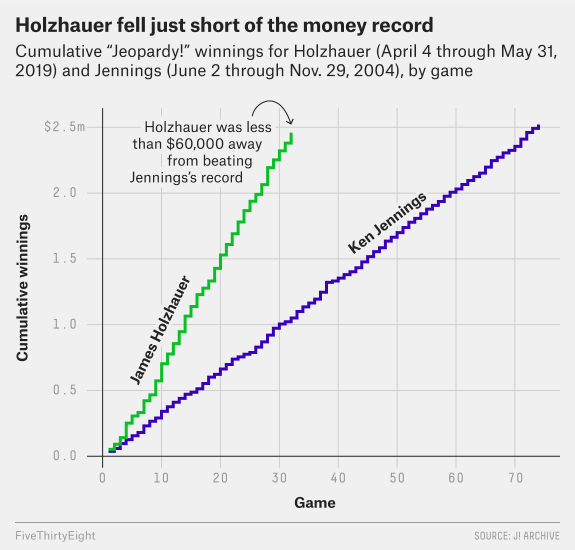

In Holzhauer's 32-game streak, he earned nearly the same amount of money that Jennings won in 74 games. Holzhauer seemed unstoppable and it shocked *Jeopardy!* fans everywhere when he lost his next game and never surpassed Jennings's record for total winnings. 

For more analysis, check out [FiveThirtyEight](https://fivethirtyeight.com/tag/games/).

## Congratulations! You have completed your final project! 

## Submission Instructions:

Since this project involves running several long simulations, the submission process for this assignment is a bit different than usual. Please follow the submissions instructions carefully or we may not be able to grade your project. It may take you about an hour to complete these steps - they *all need to be done before the 11:59pm deadline*, so don't start too late!
1. Save a copy of each histogram by right clicking on the histogram or by taking a screenshot. Submit these images to Gradescope. You only need to submit these images to Gradescope, not a PDF of the whole assignment. 
2. For designated code cells, convert the cell type to Markdown before submitting, using the drop-down menu. 
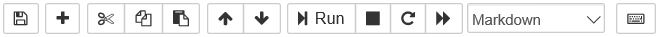
This means these code cells won't run, but your code will still be there if you need to go back and make changes. You can find all the designated cells to change by searching for the term "CONVERT TO MARKDOWN BEFORE SUBMITTING" using Control+F. The cells you need to change are between green bars.
3. Select "Kernel" -> "Restart & Run All" from the menu. This may take 10 or 20 minutes. After you've converted some code cells to Markdown, some tests will fail, and this is fine.
4. Run the submit cell below to submit your project to OKPY.

In [ ]:
_ = ok.submit()